<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_3_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n250.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,95.831256,76.740634,67.142427,0.000303,249.714621,249.714457,0.000164
1,0.0,1.0,55.556122,79.641104,42.519508,0.000159,187.716893,187.716675,0.000218
2,0.0,2.0,58.713923,89.832002,28.209615,0.000887,186.756428,186.755308,0.001120
3,0.0,3.0,75.246624,22.526247,86.251181,0.005240,194.029292,194.024958,0.004334
4,0.0,4.0,64.877870,26.863787,72.400676,-0.001372,174.140961,174.143118,-0.002157
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,69.383747,31.069106,84.570778,-0.002082,195.021549,195.023617,-0.002068
249996,999.0,246.0,50.165471,36.485698,51.377161,-0.000567,148.027764,148.028700,-0.000937
249997,999.0,247.0,45.994661,37.050123,21.209148,-0.003796,114.250136,114.254505,-0.004369
249998,999.0,248.0,32.139556,82.958752,90.571173,0.000194,215.669676,215.669826,-0.000150


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,95.831256,76.740634,67.142427,0.000303,249.714621,249.714457,0.000164
1,0.0,1.0,55.556122,79.641104,42.519508,0.000159,187.716893,187.716675,0.000218
2,0.0,2.0,58.713923,89.832002,28.209615,0.000887,186.756428,186.755308,0.001120
3,0.0,3.0,75.246624,22.526247,86.251181,0.005240,194.029292,194.024958,0.004334
4,0.0,4.0,64.877870,26.863787,72.400676,-0.001372,174.140961,174.143118,-0.002157
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,69.383747,31.069106,84.570778,-0.002082,195.021549,195.023617,-0.002068
249996,999.0,246.0,50.165471,36.485698,51.377161,-0.000567,148.027764,148.028700,-0.000937
249997,999.0,247.0,45.994661,37.050123,21.209148,-0.003796,114.250136,114.254505,-0.004369
249998,999.0,248.0,32.139556,82.958752,90.571173,0.000194,215.669676,215.669826,-0.000150


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    95.831256  76.740634  67.142427  0.000303  249.714621   
      1.0    55.556122  79.641104  42.519508  0.000159  187.716893   
      2.0    58.713923  89.832002  28.209615  0.000887  186.756428   
      3.0    75.246624  22.526247  86.251181  0.005240  194.029292   
      4.0    64.877870  26.863787  72.400676 -0.001372  174.140961   
...                ...        ...        ...       ...         ...   
999.0 245.0  69.383747  31.069106  84.570778 -0.002082  195.021549   
      246.0  50.165471  36.485698  51.377161 -0.000567  148.027764   
      247.0  45.994661  37.050123  21.209148 -0.003796  114.250136   
      248.0  32.139556  82.958752  90.571173  0.000194  215.669676   
      249.0  54.292877  40.101325  45.036176 -0.000133  149.430245   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    249.714457  0.000164  
      1.0    187.716675  0.000218  
      2.0    186.755308  0.001120  
      3.0    194.024958  0.004334  
      4.0    174.143118 -0.002157  
...                 ...       ...  
999.0 245.0  195.023617 -0.002068  
      246.0  148.028700 -0.000937  
      247.0  114.254505 -0.004369  
      248.0  215.669826 -0.000150  
      249.0  149.430734 -0.000488  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    95.831256  76.740634  67.142427  0.000303  249.714621   
      1.0    55.556122  79.641104  42.519508  0.000159  187.716893   
      2.0    58.713923  89.832002  28.209615  0.000887  186.756428   
      3.0    75.246624  22.526247  86.251181  0.005240  194.029292   
      4.0    64.877870  26.863787  72.400676 -0.001372  174.140961   
...                ...        ...        ...       ...         ...   
999.0 245.0  69.383747  31.069106  84.570778 -0.002082  195.021549   
      246.0  50.165471  36.485698  51.377161 -0.000567  148.027764   
      247.0  45.994661  37.050123  21.209148 -0.003796  114.250136   
      248.0  32.139556  82.958752  90.571173  0.000194  215.669676   
      249.0  54.292877  40.101325  45.036176 -0.000133  149.430245   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    249.714457  0.000164  
      1.0    187.716675  0.000218  
      2.0    186.755308  0.001120  
      3.0    194.024958  0.004334  
      4.0    174.143118 -0.002157  
...                 ...       ...  
999.0 245.0  195.023617 -0.002068  
      246.0  148.028700 -0.000937  
      247.0  114.254505 -0.004369  
      248.0  215.669826 -0.000150  
      249.0  149.430734 -0.000488  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,95.831256,76.740634,67.142427,0.000303,249.714621,249.714457,0.000164
1,0.0,1.0,55.556122,79.641104,42.519508,0.000159,187.716893,187.716675,0.000218
2,0.0,2.0,58.713923,89.832002,28.209615,0.000887,186.756428,186.755308,0.001120
3,0.0,3.0,75.246624,22.526247,86.251181,0.005240,194.029292,194.024958,0.004334
4,0.0,4.0,64.877870,26.863787,72.400676,-0.001372,174.140961,174.143118,-0.002157
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,69.383747,31.069106,84.570778,-0.002082,195.021549,195.023617,-0.002068
249996,999.0,246.0,50.165471,36.485698,51.377161,-0.000567,148.027764,148.028700,-0.000937
249997,999.0,247.0,45.994661,37.050123,21.209148,-0.003796,114.250136,114.254505,-0.004369
249998,999.0,248.0,32.139556,82.958752,90.571173,0.000194,215.669676,215.669826,-0.000150


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    95.831256  76.740634  67.142427  0.000303  249.714621   
      1.0    55.556122  79.641104  42.519508  0.000159  187.716893   
      2.0    58.713923  89.832002  28.209615  0.000887  186.756428   
      3.0    75.246624  22.526247  86.251181  0.005240  194.029292   
      4.0    64.877870  26.863787  72.400676 -0.001372  174.140961   
...                ...        ...        ...       ...         ...   
999.0 245.0  69.383747  31.069106  84.570778 -0.002082  195.021549   
      246.0  50.165471  36.485698  51.377161 -0.000567  148.027764   
      247.0  45.994661  37.050123  21.209148 -0.003796  114.250136   
      248.0  32.139556  82.958752  90.571173  0.000194  215.669676   
      249.0  54.292877  40.101325  45.036176 -0.000133  149.430245   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    249.714457  0.000164  
      1.0    187.716675  0.000218  
      2.0    186.755308  0.001120  
      3.0    194.024958  0.004334  
      4.0    174.143118 -0.002157  
...                 ...       ...  
999.0 245.0  195.023617 -0.002068  
      246.0  148.028700 -0.000937  
      247.0  114.254505 -0.004369  
      248.0  215.669826 -0.000150  
      249.0  149.430734 -0.000488  

[250000 rows x 7 columns]

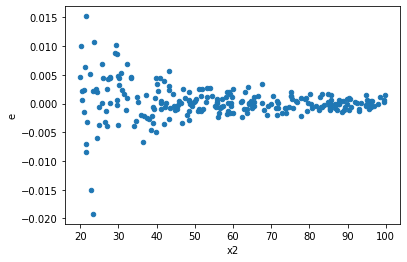

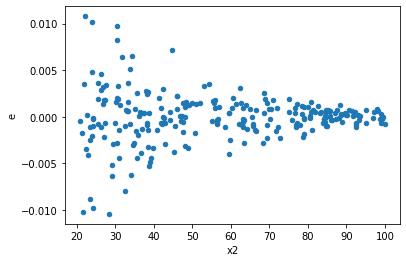

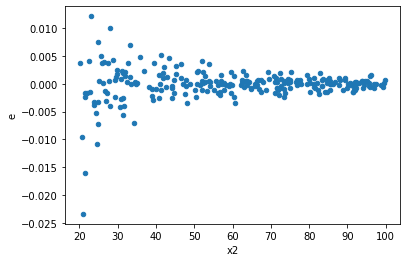

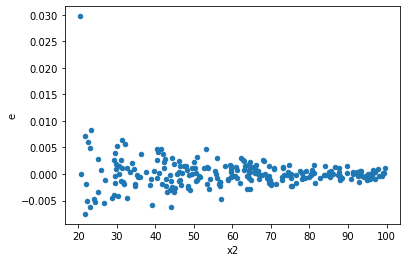

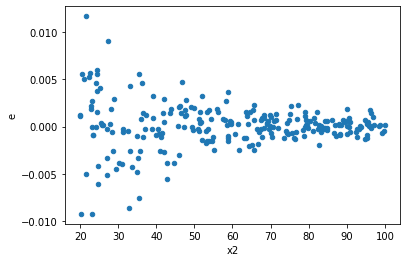

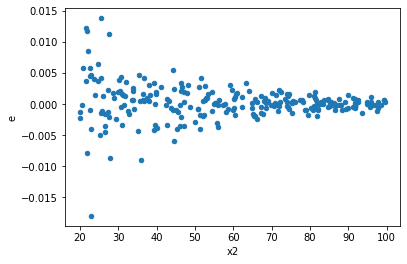

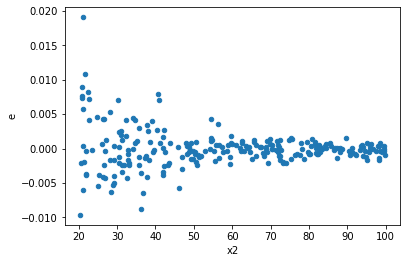

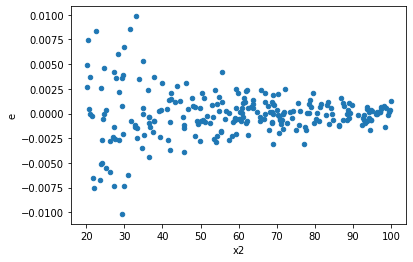

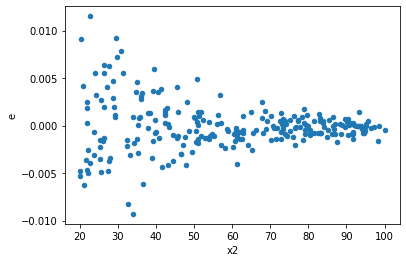

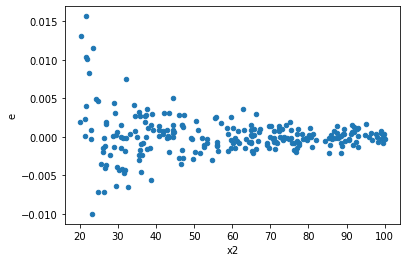

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,0.0014796420257342283,0.00030973466880546824,1.5254041502414725e-05,3.193140915520291e-06,0.20933081341196133,2.1864200241128872e-13,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,0.001288471939291818,0.00015165446344094825,1.3283215868987814e-05,1.5634480767108068e-06,0.11770102150948046,2.835914263863853e-22,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,0.0014970234621188982,0.00019472830145267803,1.5433231568236062e-05,2.0075082623987424e-06,0.13007698702133774,1.274232922319042e-20,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,0.001489228122627028,0.00017160055489113174,1.535286724357761e-05,1.769077885475585e-06,0.1152278501082997,1.2490999414339727e-22,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,0.000772768987549862,0.0002140180436292241,7.966690593297547e-06,2.206371583806434e-06,0.2769495762346633,1.0071107802407493e-09,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,0.0014206289900583942,0.00020913570203698567,1.4645659691323652e-05,2.156038165329749e-06,0.1472134550966676,1.2377364368958306e-18,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,0.0008574482644044037,0.0004322123706494182,8.839672828911378e-06,4.4557976355610125e-06,0.5040681620011668,0.0008597867021109306,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,0.0008606398793802153,0.00020977259412488066,8.872576076084694e-06,2.1626040631430997e-06,0.243740267155581,2.4740537185399364e-11,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,0.001156891067247164,0.00029416290453985474,1.1926712033475918e-05,3.0326072632974714e-06,0.2542701840025603,8.676742616141007e-11,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    981
Reject001=1 : Homoscedasticity       19
Name: Result_test, dtype: int64